In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.metrics import classification_report

In [7]:
df=pd.read_csv('bank.csv')

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [9]:
df.shape

(11162, 17)

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [13]:
s=df['age']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [14]:
len(outliers)

171

In [15]:
a=list(outliers.keys())
df.drop(a,inplace=True)

In [16]:
s=df['balance']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [17]:
len(outliers2)

1037

In [18]:
b=list(outliers2.keys())
df.drop(b,inplace=True)

In [19]:
s=df['duration']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers3=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [20]:
len(outliers3)

581

In [21]:
c=list(outliers3.keys())
df.drop(c,inplace=True)

In [22]:
df['deposit'].value_counts()

0    5326
1    4047
Name: deposit, dtype: int64

In [23]:
df.shape

(9373, 17)

In [24]:
X=df.drop('deposit',axis=1)
Y=df['deposit']

In [25]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,3
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,3
10,38,0,2,1,0,100,1,0,2,7,8,786,1,-1,0,3


In [26]:
Y.head()

3     1
4     1
5     1
8     1
10    1
Name: deposit, dtype: int64

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
ss=StandardScaler()

In [29]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [30]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(2,input_shape=(X.shape[1],),activation='relu'),
      tf.keras.layers.Dense(3,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 34        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [33]:
trained_model=model.fit(X_train_ss,Y_train,epochs=20)

Epoch 1/20
206/206 [==============================] - 1s 4ms/step - loss: 0.6743
Epoch 2/20
206/206 [==============================] - 1s 4ms/step - loss: 0.6564
Epoch 3/20
206/206 [==============================] - 1s 4ms/step - loss: 0.6342
Epoch 4/20
206/206 [==============================] - 1s 4ms/step - loss: 0.6112
Epoch 5/20
206/206 [==============================] - 1s 4ms/step - loss: 0.5879
Epoch 6/20
206/206 [==============================] - 1s 4ms/step - loss: 0.5665
Epoch 7/20
206/206 [==============================] - 1s 4ms/step - loss: 0.5471
Epoch 8/20
206/206 [==============================] - 1s 4ms/step - loss: 0.5288
Epoch 9/20
206/206 [==============================] - 1s 3ms/step - loss: 0.5115
Epoch 10/20
206/206 [==============================] - 1s 3ms/step - loss: 0.4965
Epoch 11/20
206/206 [==============================] - 1s 4ms/step - loss: 0.4842
Epoch 12/20
206/206 [==============================] - 1s 4ms/step - loss: 0.4745
Epoch 13/20
206/206 [====

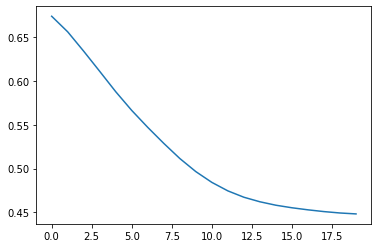

In [34]:
plt.plot(trained_model.history['loss'])

In [35]:
Y_pred=model.predict(X_test_ss)

In [36]:
Y_pred=np.where(Y_pred >=0.5,1,0)

In [37]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1603
           1       0.74      0.80      0.77      1209

    accuracy                           0.79      2812
   macro avg       0.79      0.79      0.79      2812
weighted avg       0.80      0.79      0.79      2812

